# AI-Powered Job Market Analysis
------------------------------
This script performs data cleaning, exploratory data analysis (EDA), feature engineering,
classification, and regression modeling on the AI job market dataset.

Steps include:
1. Import Libraries
2. Data Loading and Cleaning
3. Exploratory Data Analysis (EDA) and Visualization
4. Feature Engineering and Preprocessing
5. Classification Modeling and Optimization (Predicting AI Adoption Level)
6. Regression Modeling and Optimization (Predicting Salary)
7. Model Comparison and Result Analysis

## Step 1: Import Libraries and Set Up

 Import necessary libraries for data processing, visualization, modeling, and evaluation

In [1]:
import numpy as np
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error


# Step 2: Data Loading and Cleaning Ensure data quality before modeling by checking file existence, handling missing values# removing duplicates, standardizing column names, and converting data types.

In [2]:
# Define the file path to the dataset
file_path = "C:\\Users\\粟登洋\\Desktop\\ai_job_market_insights.csv"

df = pd.read_csv(file_path)
 
# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB
None

First few rows:
               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology     

In [3]:
# Function to standardize column names: lowercase, strip spaces, replace spaces with underscores
def standardize_column_names(dataframe):
    dataframe.columns = (dataframe.columns
                         .str.strip()
                         .str.lower()
                         .str.replace(' ', '_', regex=False))
    return dataframe

# Apply column name standardization
df = standardize_column_names(df)
print("\nColumn names standardized.")

# Function to check for missing values
def check_missing_values(dataframe):
    missing = dataframe.isnull().sum()
    missing_percentage = (missing / len(dataframe)) * 100
    return pd.DataFrame({"Missing Values": missing, "Percentage": missing_percentage})

# Check and display missing values summary
missing_summary = check_missing_values(df)
print("\nMissing Values Summary:")
print(missing_summary)

# Handle missing values using forward fill if any missing values are present
if missing_summary['Missing Values'].sum() > 0:
    print("Handling missing values with forward fill...")
    df = df.ffill()

# Check for duplicate rows
duplicates_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates_count}")
if duplicates_count > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")

# Define categorical columns to be converted
categorical_columns = ['industry', 'ai_adoption_level', 'automation_risk', 'remote_friendly', 'job_growth_projection']

# Convert specified columns to categorical type and handle missing values
for col in categorical_columns:
    if col in df.columns:
        if df[col].isnull().any():
            print(f"Filling NaN in {col} with 'Unknown'.")
            df[col] = df[col].fillna('Unknown')
        df[col] = df[col].astype('category')
        print(f"Converted {col} to category type.")

# Display information about the cleaned dataset
print("\nCleaned Dataset Overview:")
print(df.info())


Column names standardized.

Missing Values Summary:
                       Missing Values  Percentage
job_title                           0         0.0
industry                            0         0.0
company_size                        0         0.0
location                            0         0.0
ai_adoption_level                   0         0.0
automation_risk                     0         0.0
required_skills                     0         0.0
salary_usd                          0         0.0
remote_friendly                     0         0.0
job_growth_projection               0         0.0

Number of duplicate rows: 0
Converted industry to category type.
Converted ai_adoption_level to category type.
Converted automation_risk to category type.
Converted remote_friendly to category type.
Converted job_growth_projection to category type.

Cleaned Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column    

#Step 3: Exploratory Data Analysis (EDA) and Visualization- Visualize data distributions and relationships to understand da a characteristi  and inform feature engineering and model selection.ion.

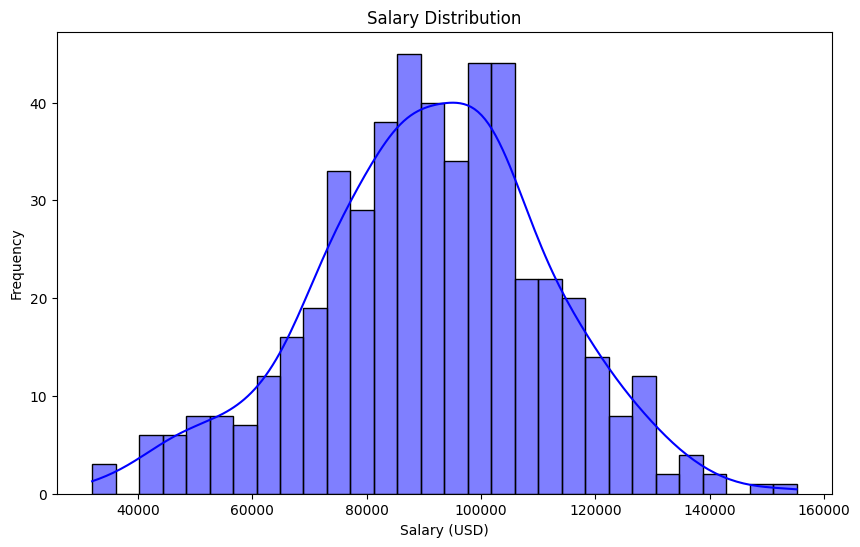

In [4]:
# Plot Salary Distribution
if 'salary_usd' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['salary_usd'], bins=30, kde=True, color="blue")
    plt.title("Salary Distribution")
    plt.xlabel("Salary (USD)")
    plt.ylabel("Frequency")
    plt.show()

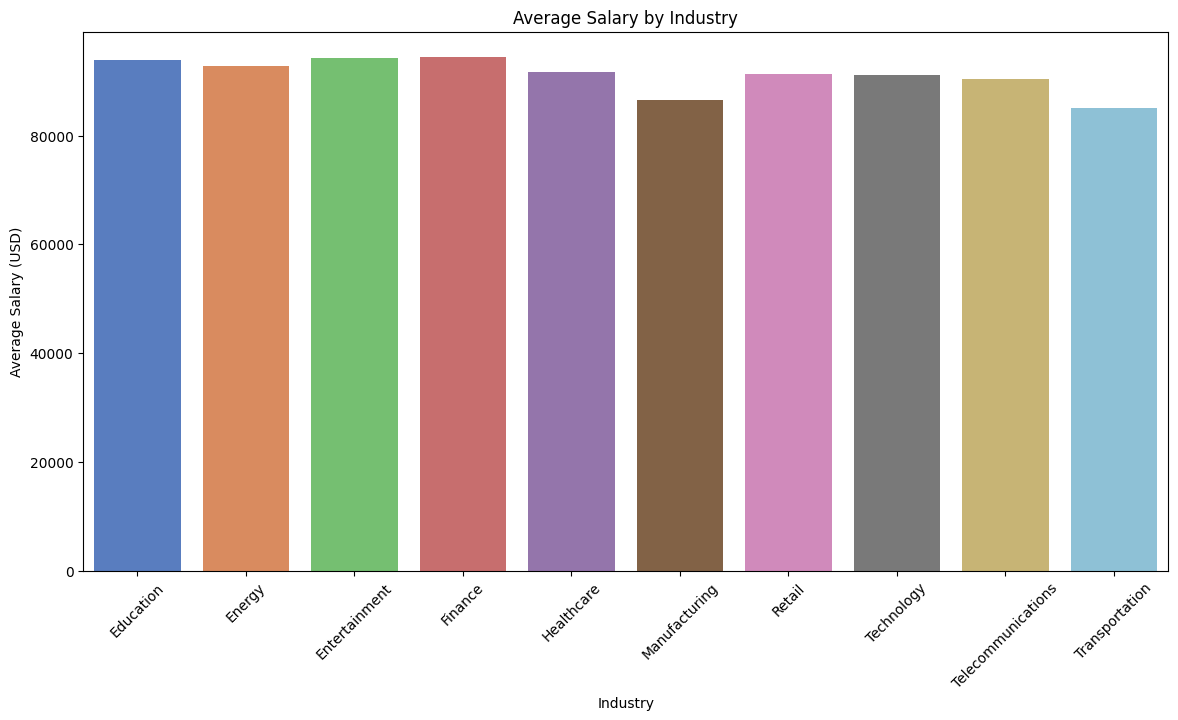

In [5]:
# Plot Average Salary by Industry
if 'industry' in df.columns and 'salary_usd' in df.columns:
    plt.figure(figsize=(14, 7))
    sns.barplot(data=df, x='industry', y='salary_usd', errorbar=None, hue='industry', palette="muted", legend=False)
    plt.title("Average Salary by Industry")
    plt.xlabel("Industry")
    plt.ylabel("Average Salary (USD)")
    plt.xticks(rotation=45)
    plt.show()

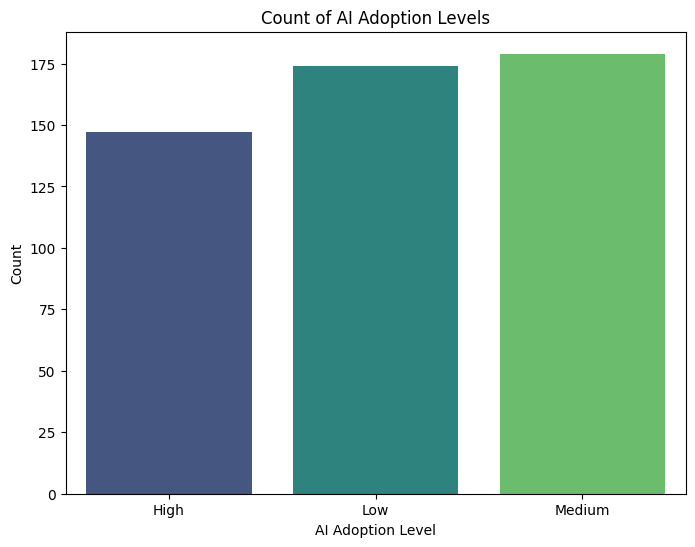

In [6]:
# Plot Count of AI Adoption Levels
if 'ai_adoption_level' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='ai_adoption_level', data=df, 
                  hue='ai_adoption_level', palette="viridis", legend=False)
    plt.title("Count of AI Adoption Levels")
    plt.xlabel("AI Adoption Level")
    plt.ylabel("Count")
    plt.show()


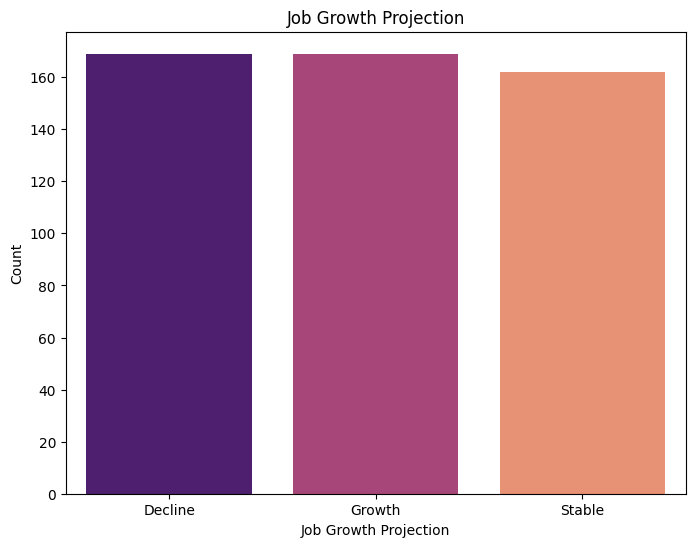

In [7]:
# Additional visualization for 'job_growth_projection' if applicable
if 'job_growth_projection' in df.columns and df['job_growth_projection'].dtype.name == 'category':
    plt.figure(figsize=(8, 6))
    sns.countplot(x='job_growth_projection', data=df, hue='job_growth_projection', 
                  palette="magma", legend=False)
    plt.title("Job Growth Projection")
    plt.xlabel("Job Growth Projection")
    plt.ylabel("Count")
    plt.show()


# Step 4: Feature Engineering and Preprocessingm-
 Encode categorical variables, scale numerical features, and prepare data for modelintrap

In [8]:
# Initialize OneHotEncoder to encode categorical variables, dropping the first category to avoid dummy variable trap
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_data = df[categorical_columns]
categorical_encoded = encoder.fit_transform(categorical_data)
encoded_columns = encoder.get_feature_names_out(categorical_columns)
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoded_columns)

In [9]:
# Select numerical features for scaling
numerical_features = ['salary_usd']
df_combined = pd.concat([df[numerical_features].reset_index(drop=True), categorical_encoded_df], axis=1)

In [10]:
# Initialize StandardScaler to standardize numerical features
scaler = StandardScaler()
df_combined[numerical_features] = scaler.fit_transform(df_combined[numerical_features])

# Step 5: Classification Modeling (Predicting AI Adoption Level)
Use a Random Forest Classifier to predict AI Adoption Level based on featus.
GridSearchCV is used to find the best hyperparameters.

In [11]:
# Define feature matrix X and target vector y for classification
X_class = df_combined.drop(columns=['salary_usd'])
y_class = df['ai_adoption_level'].cat.codes


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [13]:
# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

In [14]:
# Define hyperparameter grid for GridSearchCV
param_grid_clf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [15]:
# Initialize GridSearchCV with 5-fold cross-validation
grid_search_clf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_clf, cv=5, scoring='accuracy')
grid_search_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [16]:
# Display best parameters found by GridSearchCV
print("\nBest Parameters for Classification:")
print(grid_search_clf.best_params_)


Best Parameters for Classification:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [17]:
# Use the best estimator to make predictions on the test set
best_rf_clf = grid_search_clf.best_estimator_
y_pred_clf = best_rf_clf.predict(X_test)

In [72]:
# Print classification report and accuracy score
print("\nClassification Report:")
print(classification_report(y_test, y_pred_clf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_clf):.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        37

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Accuracy: 1.00


In [18]:
# Visualize Grid Search Results for Classification
results_clf = pd.DataFrame(grid_search_clf.cv_results_)
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

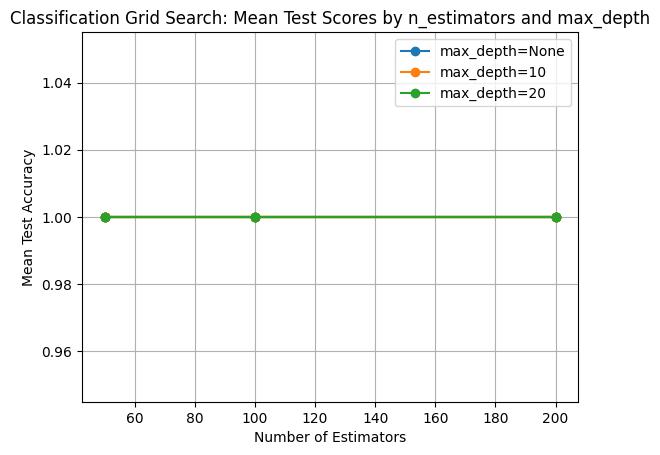

In [19]:
# Plot mean test scores for different max_depth values
for depth in param_grid_clf['max_depth']:
    subset = results_clf[results_clf['param_max_depth'] == depth]
    plt.plot(subset['param_n_estimators'], subset['mean_test_score'], marker='o', label=f"max_depth={depth}")

plt.title("Classification Grid Search: Mean Test Scores by n_estimators and max_depth")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Regression Modeling (Predicting Salary)Use various regression models (Random Forest, Gradient Boosting, Linear Regression, XGBoost) to predict salary based on features. Perform hyperparameter optimization and compare models.
.

In [20]:
# Define feature matrix X and target vector y for regression
X_reg = df_combined.drop(columns=['salary_usd'])
y_reg = df_combined['salary_usd']

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid_reg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_reg = GridSearchCV(estimator=rf_reg, param_grid=param_grid_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_reg.fit(X_train_reg, y_train_reg)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [21]:
# Display best parameters found by GridSearchCV
print("\nBest Parameters for Regression:")
print(grid_search_reg.best_params_)


Best Parameters for Regression:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [22]:
# Use the best estimator to make predictions on the test set
best_rf_reg = grid_search_reg.best_estimator_
y_pred_reg = best_rf_reg.predict(X_test_reg)

In [23]:
# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Random Forest Regression MSE: {mse:.2f}")

Random Forest Regression MSE: 1.29


In [24]:
# Visualize Grid Search Results for Regression
results_reg = pd.DataFrame(grid_search_reg.cv_results_)
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

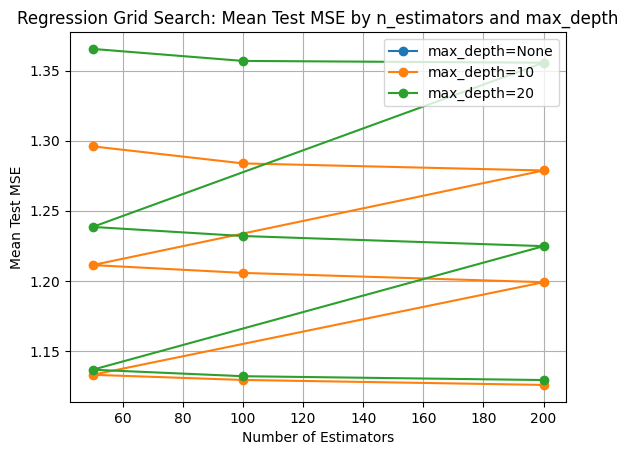

In [25]:
# Plot mean test MSE for different max_depth values
for depth in param_grid_reg['max_depth']:
    subset = results_reg[results_reg['param_max_depth'] == depth]
    plt.plot(subset['param_n_estimators'], -subset['mean_test_score'], marker='o', label=f"max_depth={depth}")

plt.title("Regression Grid Search: Mean Test MSE by n_estimators and max_depth")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Test MSE")
plt.legend()
plt.grid(True)
plt.show()


# Step 7: Further Optimization (Feature Engineering and Additional Models) Enhance regression performance by selecting important features, creating polynomial features,and experimenting with different regression models Linear Regression..

In [26]:
# Fit the best Random Forest Regressor to obtain feature importances
best_rf_reg.fit(X_train_reg, y_train_reg)
feature_importances = pd.Series(best_rf_reg.feature_importances_, index=X_reg.columns)
print("\nFeature Importances from Random Forest:")
print(feature_importances.sort_values(ascending=False))


Feature Importances from Random Forest:
remote_friendly_Yes             0.075417
ai_adoption_level_Low           0.072858
industry_Healthcare             0.072259
automation_risk_Medium          0.071045
industry_Energy                 0.068729
job_growth_projection_Stable    0.068016
automation_risk_Low             0.065792
job_growth_projection_Growth    0.065138
industry_Finance                0.064197
industry_Transportation         0.062020
industry_Telecommunications     0.059549
industry_Retail                 0.057775
industry_Entertainment          0.057318
ai_adoption_level_Medium        0.056891
industry_Manufacturing          0.047927
industry_Technology             0.035070
dtype: float64


In [27]:
# Select top 10 important features
top_features = feature_importances.sort_values(ascending=False).head(10).index
X_reg_optimized = X_reg[top_features]

# Create polynomial features to capture interaction terms and non-linear relationships
poly = PolynomialFeatures(degree=2, include_bias=False)
X_reg_poly = poly.fit_transform(X_reg_optimized)
print("\nPolynomial features created.")

# Split the data with polynomial features
X_train_reg_poly, X_test_reg_poly, y_train_reg_poly, y_test_reg_poly = train_test_split(
    X_reg_poly, y_reg, test_size=0.2, random_state=42)


Polynomial features created.


In [28]:
# Initialize and perform RandomizedSearchCV for Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
param_dist_gbr = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10]
}
random_search_gbr = RandomizedSearchCV(
    gbr, param_dist_gbr, n_iter=10, scoring='neg_mean_squared_error',
    cv=5, random_state=42, n_jobs=1)  # 设置 n_jobs=1 以避免编码问题
random_search_gbr.fit(X_train_reg_poly, y_train_reg_poly)


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error')

In [29]:
# Display best parameters for Gradient Boosting Regressor
print("\nBest Parameters for Gradient Boosting Regressor:")
print(random_search_gbr.best_params_)


Best Parameters for Gradient Boosting Regressor:
{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}


In [30]:
# Predict and evaluate Gradient Boosting Regressor
best_gbr = random_search_gbr.best_estimator_
y_pred_gbr = best_gbr.predict(X_test_reg_poly)
mse_gbr = mean_squared_error(y_test_reg_poly, y_pred_gbr)
print(f"Gradient Boosting Regressor MSE: {mse_gbr:.2f}")

Gradient Boosting Regressor MSE: 1.23


In [31]:
# Initialize and train Linear Regression as a baseline model
lr = LinearRegression()
lr.fit(X_train_reg_poly, y_train_reg_poly)
y_pred_lr = lr.predict(X_test_reg_poly)
mse_lr = mean_squared_error(y_test_reg_poly, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr:.2f}")

Linear Regression MSE: 1.41


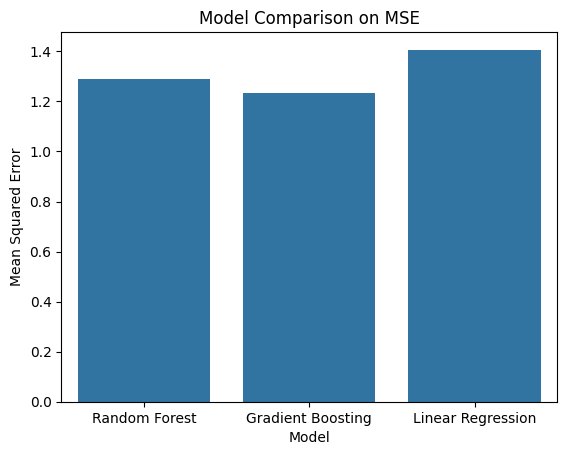

In [36]:
sns.barplot(x=models, y=mse_scores, legend=False)
plt.title("Model Comparison on MSE")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.show()
